In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import folium

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
covid_19_df = pd.read_csv('covid_150320.csv', parse_dates=['Last Update'])
covid_19_df['Last Update'] = pd.to_datetime(covid_19_df['Last Update'])
covid_19_df['Country/Region'] = covid_19_df['Country/Region'].replace('Mainland China', 'China')
covid_19_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-15 18:20:18,67794,3085,54288,30.9756,112.2707
1,NaN,Italy,2020-03-14 20:13:16,24747,1809,2335,41.8719,12.5674
2,NaN,Iran,2020-03-15 18:20:18,13938,724,4590,32.4279,53.6880
3,NaN,"Korea, South",2020-03-15 18:20:18,8162,75,510,35.9078,127.7669
4,NaN,Spain,2020-03-15 18:20:18,7798,289,517,40.4637,-3.7492


In [20]:
covid_19_time_df = pd.read_csv('covid_19_1603.csv')
covid_19_time_df['Date'] = pd.to_datetime(covid_19_time_df['Date'])
covid_19_time_df['Country/Region'] = covid_19_time_df['Country/Region'].replace('Mainland China', 'China')
covid_19_time_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
13927,NaN,Central African Republic,6.6111,20.9394,2020-03-15,1,0,0
13928,NaN,Congo (Brazzaville),-4.0383,21.7587,2020-03-15,1,0,0
13929,NaN,Equatorial Guinea,1.5000,10.0000,2020-03-15,1,0,0
13930,Mayotte,France,-12.8275,45.1662,2020-03-15,1,0,0
13931,NaN,Uzbekistan,41.3775,64.5853,2020-03-15,1,0,0


In [21]:
grouped_by_country = covid_19_df.groupby('Country/Region').sum().reset_index()
grouped_by_country.head()

,Country/Region,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Afghanistan,16,0,0,33.9391,67.7100
1,Albania,42,1,0,41.1533,20.1683
2,Algeria,48,4,12,28.0339,1.6596
3,Andorra,1,0,1,42.5063,1.5218
4,Antigua and Barbuda,1,0,0,17.0608,-61.7964


### Vizualize cases on map

In [22]:
f = folium.Figure(width=600, height=450)
m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=10, zoom_start=1
              )

for i in range(0, len(covid_19_df)):
    folium.Circle(
        location=[covid_19_df.iloc[i]['Latitude'], covid_19_df.iloc[i]['Longitude']],
        color='crimson', 
        tooltip =   '<li><bold>Country : '+str(covid_19_df.iloc[i]['Country/Region'])+
                    '<li><bold>Province : '+str(covid_19_df.iloc[i]['Province/State'])+
                    '<li><bold>Confirmed : '+str(covid_19_df.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(covid_19_df.iloc[i]['Deaths'])+
                    '<li><bold>Recovered : '+str(covid_19_df.iloc[i]['Recovered']),
        radius=int(covid_19_df.iloc[i]['Confirmed'])**1.1).add_to(m)
f.add_child(m)

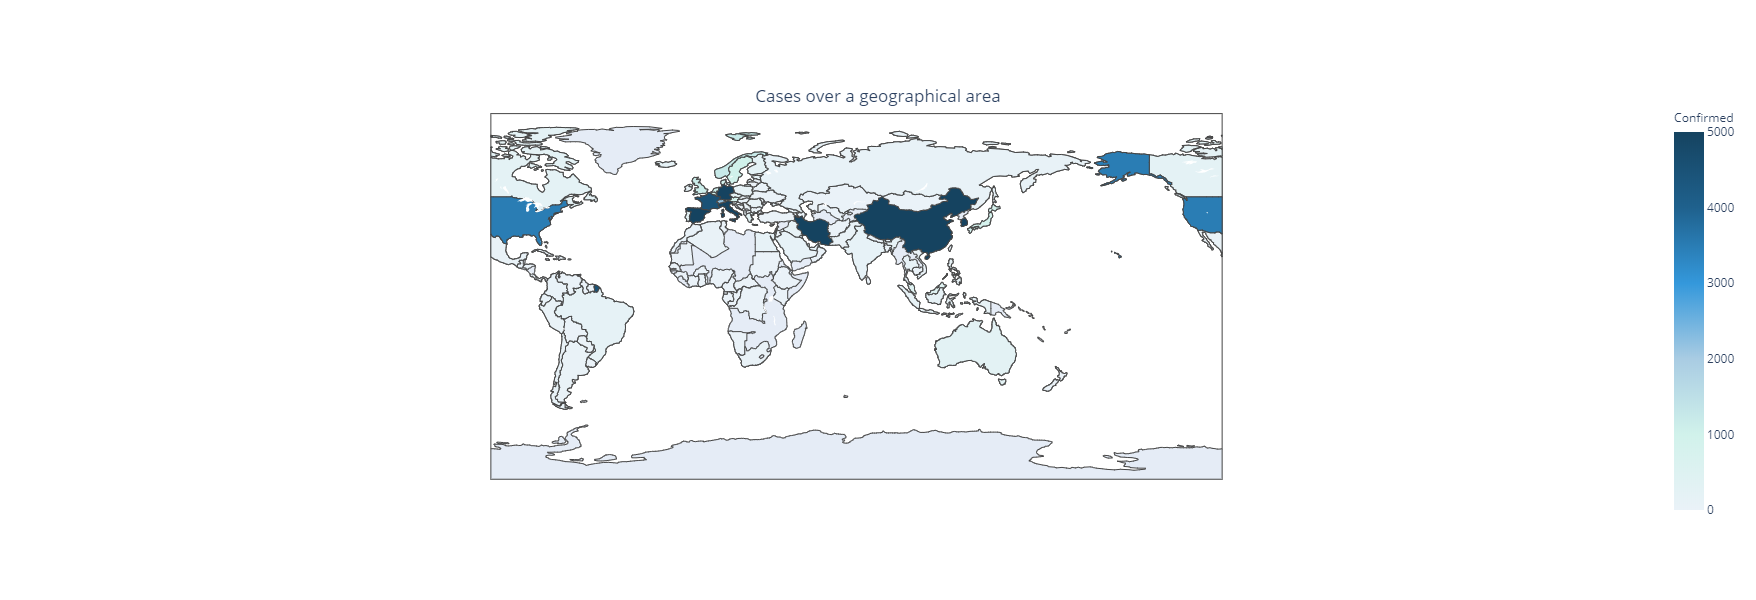

In [23]:
fig = px.choropleth(grouped_by_country, locations="Country/Region", 
                    locationmode='country names', color="Confirmed", 
                    hover_name="Country/Region", color_continuous_scale=['#eaf2f8', '#d1f2eb', '#a9cce3', '#3498DB', '#1f618d', '#154360'],
                           range_color=(0, 5000),
                    title='Countries with Confirmed Cases', width=800, height=600)
fig.update_layout(
    title={
        'text': "Cases over a geographical area",
        'y': 0.85,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

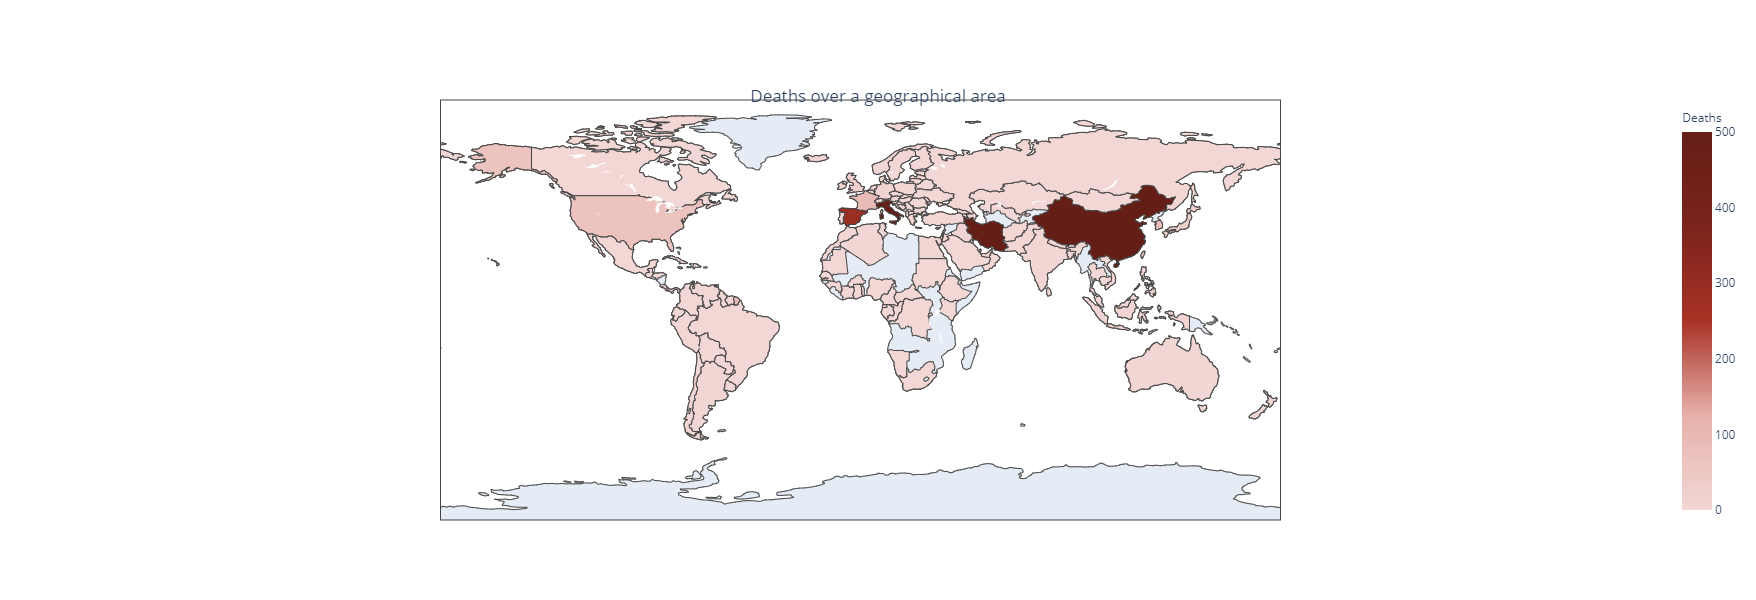

In [24]:
fig = px.choropleth(grouped_by_country, locations="Country/Region", 
                    locationmode='country names', color="Deaths", 
                    hover_name="Country/Region", color_continuous_scale=['#f2d7d5', '#e6b0aa', '#a93226', '#7b241c', '#641e16'],
                           range_color=(0, 500),
                    title='Countries with death rates', width=800, height=600)
fig.update_layout(
    title={
        'text': "Deaths over a geographical area",
        'y': 0.85,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

### Representation spatial variations of a quantity.

In [ ]:
full_covid_19_df = covid_19_time_df.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()

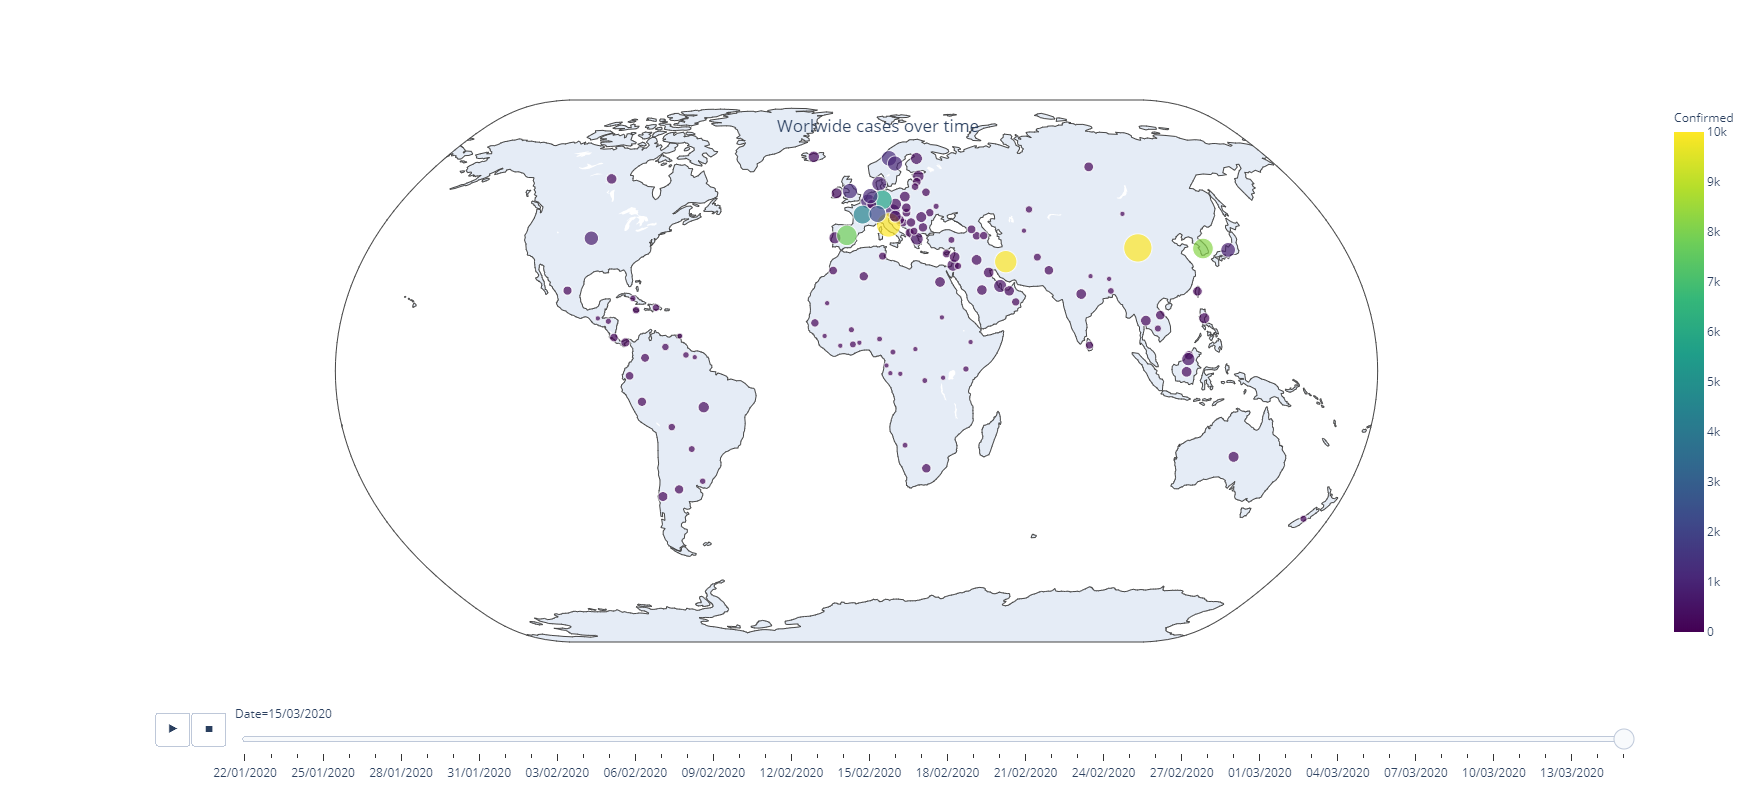

In [26]:
full_covid_19_df = full_covid_19_df.reset_index()
full_covid_19_df['Date'] = pd.to_datetime(full_covid_19_df['Date'])
full_covid_19_df['Date'] = full_covid_19_df['Date'].dt.strftime('%d/%m/%Y')
full_covid_19_df['size'] = full_covid_19_df['Confirmed'].pow(0.3)

fig = px.scatter_geo(full_covid_19_df, locations="Country/Region", locationmode='country names', color_continuous_scale="Viridis",
                     color="Confirmed", size='size', hover_name="Country/Region", 
                     range_color= [0, 10000], 
                     projection="natural earth", animation_frame="Date", 
                     title='Spread over time', width=1000, height=800)
fig.update_layout(
    title={
        'text': "Worlwide cases over time",
        'y': 0.85,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()